<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Linear_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear SVC

Creator: Bereczki Zoltán

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve
import io



# 1.) Linear SVC in case of linear separation

-  load the Iris dataset (can be found in sklearn API)
-   scale the data and plot the petal length vs petal width in a scatterplot colored with the target
-   train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
-   visualize the model's decision boundary and the margins based on the coefficients learnt by the model
-   interpret the results, what is the role of the C hyperparameter?


In [ ]:
# Load iris data
iris_dataset = datasets.load_iris() 

# Separata iris data into data and target
X = iris_dataset.data  # row represent the samples and the colomns are the following: Sepal Length, Sepal Width, Petal Length and Petal Width
y = iris_dataset.target
y_names = iris_dataset.target_names
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Scale data

# First method: do manually
X = (X - X.mean(0))/X.std(0)

# Second method: use StandardScaler from sklearn
#standardscaler = StandardScaler()
#X= standardscaler.fit_transform(X)

X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

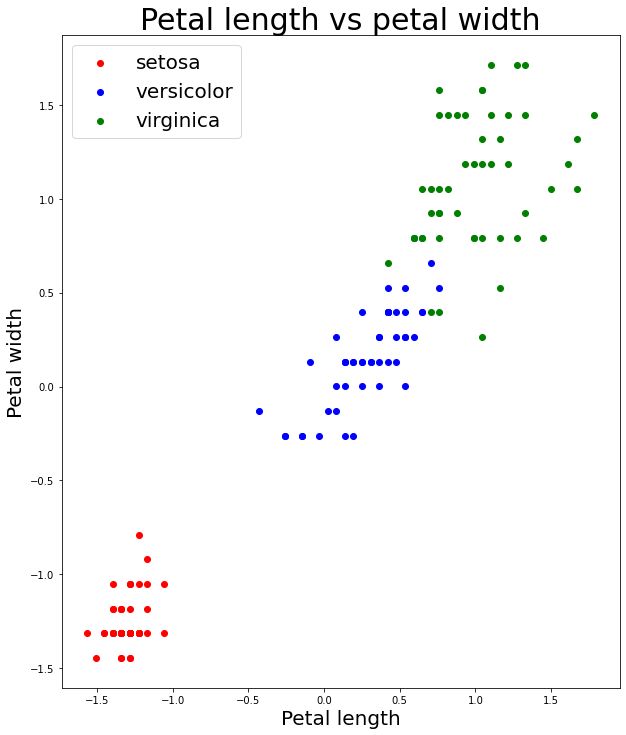

In [ ]:
# Extract the required data from whole data
petal_length = X[:, 2]
petal_width = X[:, 3]

# Plot petal length against petal width
fig, ax = plt.subplots(figsize=(10, 12))

colors = ['red', 'blue', 'green']

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
for label, color in zip(range(len(y_names)), colors):
  # plot only those data rows where there is data according to actual label
  ax.scatter(petal_length[y==label],
             petal_width[y==label],
             label=y_names[label],
             c=color)


ax.set_title('Petal length vs petal width', fontsize=30)
ax.set_xlabel('Petal length', fontsize=20)
ax.set_ylabel('Petal width', fontsize=20)

ax.legend(loc='upper left', fontsize=20)
plt.show()



In [ ]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X[:, [2, 3]], y, test_size=0.3, random_state = 1)

In [ ]:
# Create linear svc object when C is 1
lin_svc = SVC(kernel='linear', C=1)
lin_svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
lin_svc.coef_

array([[-1.52533842, -0.9311688 ],
       [-0.68487142, -0.60163267],
       [-1.6893083 , -2.45522966]])

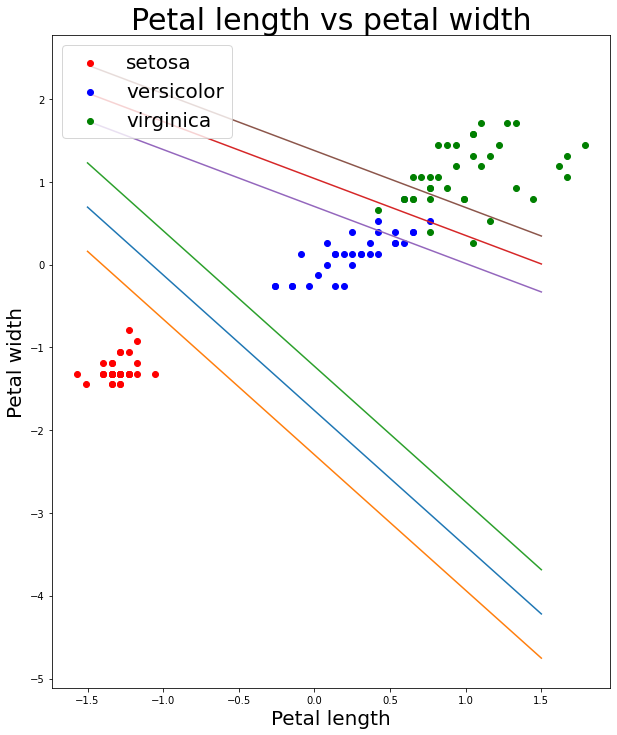

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))

colors = ['red', 'blue', 'green']

petal_length_train = X_train[:, 0]
petal_width_train = X_train[:, 1]

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
for label, color in zip(range(len(y_names)), colors):
  # plot only those data rows where there is data according to actual label
  ax.scatter(petal_length_train[y_train==label],
             petal_width_train[y_train==label],
             label=y_names[label],
             c=color)


ax.set_title('Petal length vs petal width', fontsize=30)
ax.set_xlabel('Petal length', fontsize=20)
ax.set_ylabel('Petal width', fontsize=20)

# First 2 class
w = lin_svc.coef_[0]
b = lin_svc.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

# Second and third class
w = lin_svc.coef_[2]
b = lin_svc.intercept_[2]
a = -w[0]/w[1]
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)



ax.legend(loc='upper left', fontsize=20)
plt.show()


In [ ]:
lin_svc_2 = SVC(kernel='linear', C=1000)
lin_svc_2.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

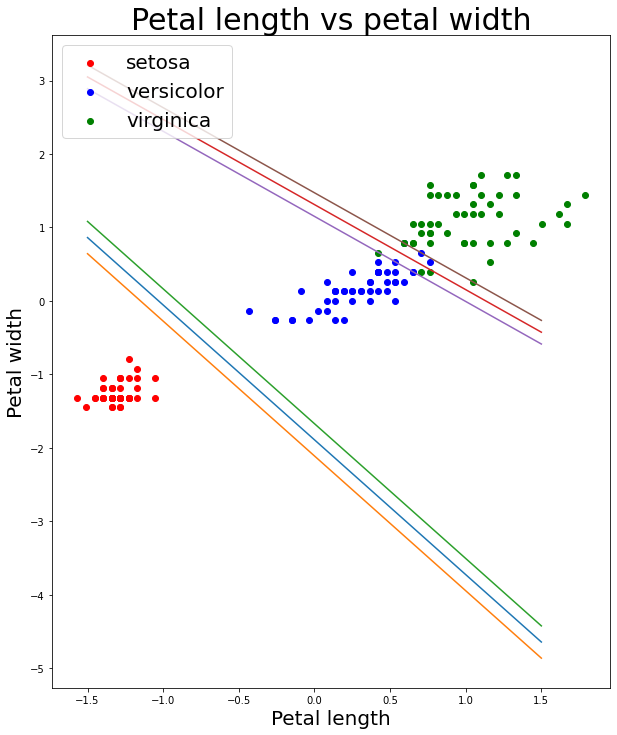

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))

colors = ['red', 'blue', 'green']

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
for label, color in zip(range(len(y_names)), colors):
  # plot only those data rows where there is data according to actual label
  ax.scatter(petal_length[y==label],
             petal_width[y==label],
             label=y_names[label],
             c=color)


ax.set_title('Petal length vs petal width', fontsize=30)
ax.set_xlabel('Petal length', fontsize=20)
ax.set_ylabel('Petal width', fontsize=20)

# First 2 class
w = lin_svc_2.coef_[0]
b = lin_svc_2.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc_2.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

# Second and third class
w = lin_svc_2.coef_[2]
b = lin_svc_2.intercept_[2]
a = -w[0]/w[1]
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc_2.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)



ax.legend(loc='upper left', fontsize=20)
plt.show()


# 2.) Linear SVC but non-linear separation
- create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
- perform the same steps just as in the previous exercise and use the linear kernel for the SVC
- since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
- write down with your own words in few sentences how the support vector machine works

In [ ]:
# Create dataset
X, y = datasets.make_moons(noise=0.1, random_state=0)

# Scale data
X = (X - X.mean(0))/X.std(0)



In [ ]:
y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

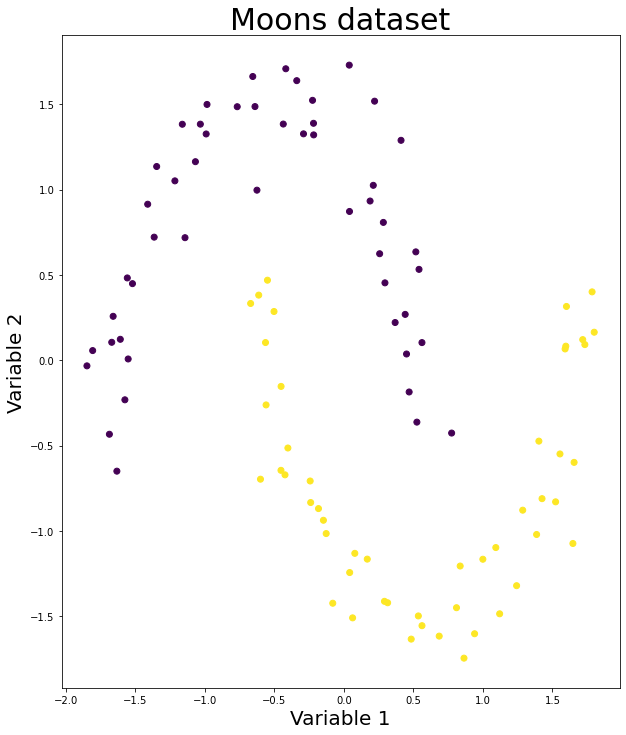

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
# plot only those data rows where there is data according to actual label
ax.scatter(X[:, 0],
           X[:, 1],
           c=y)


ax.set_title('Moons dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)

plt.show()

In [ ]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

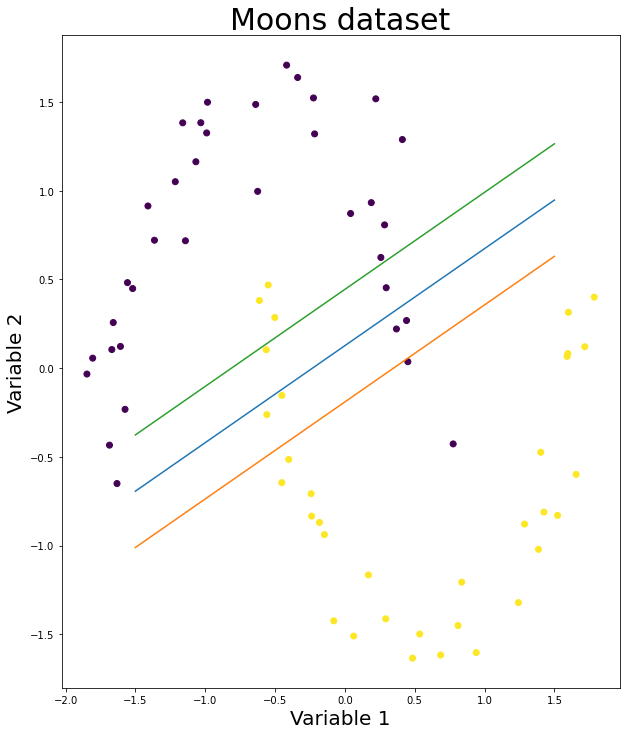

In [ ]:
# Create linear svc object when C is 1
lin_svc3 = SVC(kernel='linear', C=1)
lin_svc3.fit(X_train, y_train)

# Plot decision bounderias and margins
fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
ax.scatter(X_train[:, 0],
           X_train[:, 1],
           c=y_train)


ax.set_title('Moons dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)


w = lin_svc3.coef_[0]
b = lin_svc3.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

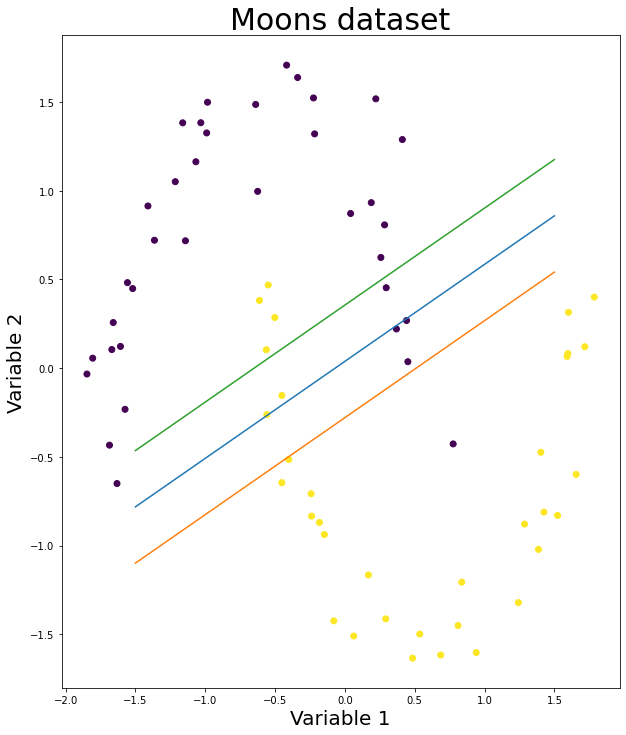

In [ ]:
# Create linear svc object when C is 1
lin_svc4 = SVC(kernel='linear', C=1000)
lin_svc4.fit(X_train, y_train)

# Plot decision bounderias and margins
fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
ax.scatter(X_train[:, 0],
           X_train[:, 1],
           c=y_train)


ax.set_title('Moons dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)


w = lin_svc4.coef_[0]
b = lin_svc4.intercept_[0]
a = -w[0]/w[1]
x_points = np.linspace(-1.5, 1.5)
#y_points = -(w[0]/w[1])*x_points-b/w[1]
y_points = a * x_points - (b/w[1])
ax.plot(x_points, y_points)

margin = 1/np.sqrt(np.sum(lin_svc.coef_ ** 2))
y_points_down = y_points - np.sqrt(1 + a ** 2) * margin
y_points_up = y_points + np.sqrt(1 + a ** 2) * margin
ax.plot(x_points, y_points_down)
ax.plot(x_points, y_points_up)

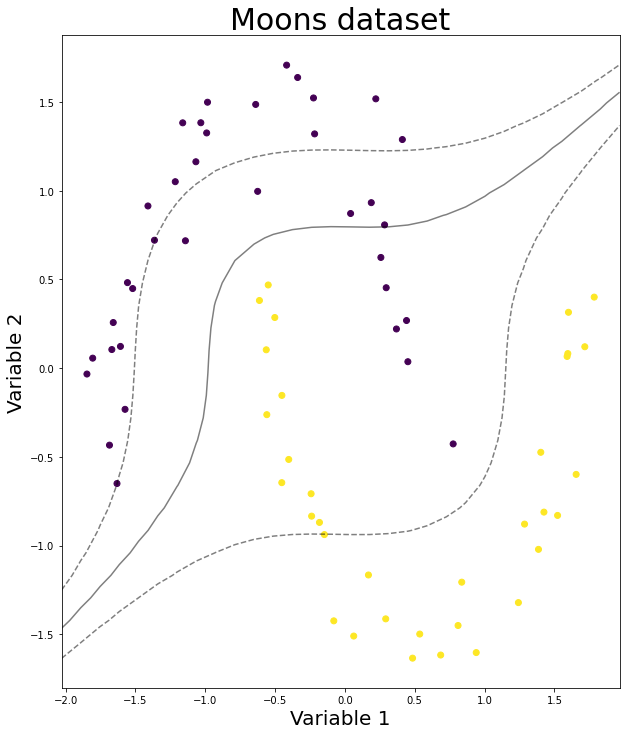

In [ ]:
# Polynomial feature SVC
poly_svc = SVC(kernel='poly', degree=3, C=1)
poly_svc.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(10, 12))

# Loop through from 0 to 2 since labels are encoded in this way in y and through colors at once
ax.scatter(X_train[:, 0],
           X_train[:, 1],
           c=y_train)


ax.set_title('Moons dataset', fontsize=30)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)

# Extract X and Y axis limits
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

# Create a meshgrid
x_points = np.linspace(x_lim[0], x_lim[1], 30)
y_points = np.linspace(y_lim[0], y_lim[1], 30)
Y_mesh, X_mesh = np.meshgrid(y_points, x_points)
xy = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T
P = poly_svc.decision_function(xy).reshape(X_mesh.shape)

ax.contour(X_mesh, Y_mesh, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

# Plot support vectors
#ax.scatter(poly_svc.support_vectors_[:, 0], poly_svc.support_vectors_[:, 1])

# 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings
**Reminder:**

- you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels

- train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)

- generate prediction for the samples that were not used during the training

**To-do now:**

- build default SVC, but set it to predict probabilities
- plot the ROC curve and calculate the confusion matrix for the predictions
- do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure) *how good is the performance of the new model?

In [ ]:
# Upload the data
from google.colab import files

uploaded = files.upload()

Saving aar3247_cohen_sm_tables-s1-s11.xlsx to aar3247_cohen_sm_tables-s1-s11.xlsx


In [ ]:
# Load the protein level data as pandas dataframe
cancer_df = pd.read_excel(io.BytesIO(uploaded['aar3247_cohen_sm_tables-s1-s11.xlsx']), sheet_name='Table S6', skiprows=2, skipfooter=4)
patients = cancer_df.pop('Patient ID #')
cancer_df.pop('Sample ID #')
cancer_df.pop('AJCC Stage')

len(pd.unique(patients)), len(patients)

(1188, 1817)

In [ ]:
# Replace '*' with ' ' and convert all data into float type
for c in cancer_df.columns.values[1:-2]:
    cancer_df[c] = cancer_df[c].astype(str).str.replace('*', '').astype(float)

# Handle missing data
cancer_df.dropna(axis=0, inplace=True)

# Extract target and CancerSEEK data
y = cancer_df.pop('Tumor type')
CancerSEEK = cancer_df.pop('CancerSEEK Logistic Regression Score')
CancerSEEK_class = cancer_df.pop('CancerSEEK Test Result')

In [ ]:
# Check number of missing data
cancer_df.isna().sum()

AFP (pg/ml)                    0
Angiopoietin-2 (pg/ml)         0
AXL (pg/ml)                    0
CA-125 (U/ml)                  0
CA 15-3 (U/ml)                 0
CA19-9 (U/ml)                  0
CD44 (ng/ml)                   0
CEA (pg/ml)                    0
CYFRA 21-1 (pg/ml)             0
DKK1 (ng/ml)                   0
Endoglin (pg/ml)               0
FGF2 (pg/ml)                   0
Follistatin (pg/ml)            0
Galectin-3 (ng/ml)             0
G-CSF (pg/ml)                  0
GDF15 (ng/ml)                  0
HE4 (pg/ml)                    0
HGF (pg/ml)                    0
IL-6 (pg/ml)                   0
IL-8 (pg/ml)                   0
Kallikrein-6 (pg/ml)           0
Leptin (pg/ml)                 0
Mesothelin (ng/ml)             0
Midkine (pg/ml)                0
Myeloperoxidase (ng/ml)        0
NSE (ng/ml)                    0
OPG (ng/ml)                    0
OPN (pg/ml)                    0
PAR (pg/ml)                    0
Prolactin (pg/ml)              0
sEGFR (pg/

In [ ]:
# Without norrmalization

# Convert target to 0 and 1 based on cancerous or not
y_is_cancer = [0 if i == 'Normal' else 1 for i in y]
#np.mean(y_is_cancer)

# Extract all second rows as training set
x_train, y_train = cancer_df[::2], y_is_cancer[::2]

# Extract the previously skipped rows as test set
x_test, y_test = cancer_df[1::2], y_is_cancer[1::2]

# Create SVC object with default settings
default_SVC = SVC(probability=True)

# Fit training set
default_SVC.fit(x_train, y_train)

# Predict probabilities
y_pred = default_SVC.predict_proba(x_test)

In [ ]:
# confusion matrix SVC (not normalized)
confusion_matrix(y_pred=y_pred[:,1] > 0.5, y_true=y_is_cancer[1::2])

array([[326,  73],
       [113, 389]])

In [ ]:
# confusion matrix CancerSEEK results (not normalized)
confusion_matrix(y_pred=CancerSEEK[1::2] > 0.5, y_true=y_is_cancer[1::2])

array([[356,  43],
       [104, 398]])

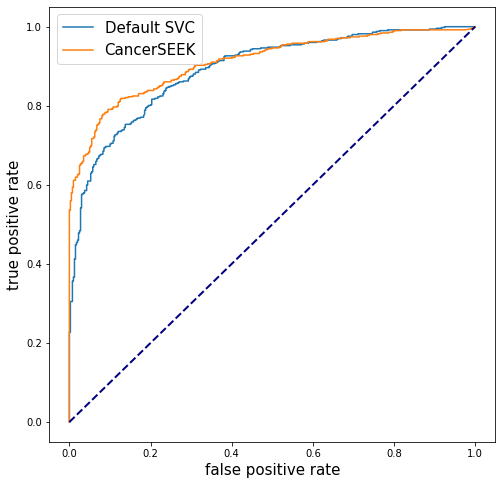

In [ ]:
# Plot ROC curve (not normalized)
plt.figure(figsize=(8, 8))
fpr1, tpr1, _ = roc_curve(y_test, y_pred[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, CancerSEEK[1::2])

plt.plot(fpr1, tpr1, label='Default SVC')
plt.plot(fpr2, tpr2, label='CancerSEEK')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

CancerSEEK performs better than default SVC model with not normalized data based on confusion matrix and ROC plot. 

# 4.) Scale data and try different kernels
- scale your data before applying the SVC model
- plot the ROC curve and calculate the confusion matrix for the predictions
- does your model perform better or worse after scaling?
- try out other kernels (linear, poly) and evaluate the performance of the model the same way

In [ ]:
# Normalize data
cancer_df = (cancer_df - cancer_df.mean())/cancer_df.std()

# Convert target to 0 and 1 based on cancerous or not
y_is_cancer = [0 if i == 'Normal' else 1 for i in y]
np.mean(y_is_cancer)

0.5568496949528563

In [ ]:
# Extract all second rows as training set
x_train, y_train = cancer_df[::2], y_is_cancer[::2]

# Extract the previously skipped rows as test set
x_test, y_test = cancer_df[1::2], y_is_cancer[1::2]

In [ ]:
# Create SVC object with default settings
default_SVC = SVC(probability=True)

# Fit training set
default_SVC.fit(x_train, y_train)

# Predict probabilities
y_pred_def = default_SVC.predict_proba(x_test)

In [ ]:
# confusion matrix SVC
confusion_matrix(y_pred=y_pred_def[:,1] > 0.5, y_true=y_is_cancer[1::2])

array([[354,  45],
       [ 73, 429]])

In [ ]:
# confusion matrix CancerSEEK results
confusion_matrix(y_pred=CancerSEEK[1::2] > 0.5, y_true=y_is_cancer[1::2])

array([[356,  43],
       [104, 398]])

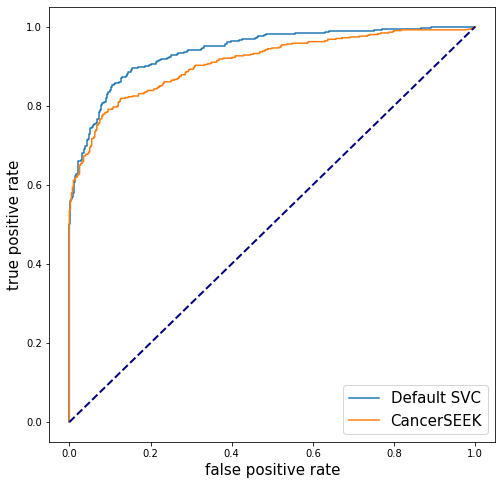

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
fpr1, tpr1, _ = roc_curve(y_test, y_pred_def[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, CancerSEEK[1::2])

plt.plot(fpr1, tpr1, label='Default SVC')
plt.plot(fpr2, tpr2, label='CancerSEEK')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

The default SVC with normalized data performs better than CancerSEEK based on both confusion matrix and ROC plot, because there are more true positive prediction of SVC model, if we see the ROC curve and the confusion matrix, but it also turned out the SVC model predict more true negatives compared to CancerSEEK in confusion matrix. 

In [ ]:
# Linear SVC

# Create SVC object with default settings
lin_cancer_SVC = SVC(kernel='linear', probability=True)

# Fit training set
lin_cancer_SVC.fit(x_train, y_train)

# Predict probabilities
y_pred_lin = lin_cancer_SVC.predict_proba(x_test)

# Polynomial SVC with degree 3
poly_cancer_SVC = SVC(kernel='poly', probability=True)

# Fit training set
poly_cancer_SVC.fit(x_train, y_train)

# Predict probabilities
y_pred_poly = poly_cancer_SVC.predict_proba(x_test)

In [ ]:
# confusion matrix linear SVC
confusion_matrix(y_pred=y_pred_lin[:,1] > 0.5, y_true=y_is_cancer[1::2])

array([[353,  46],
       [ 84, 418]])

In [ ]:
# confusion matrix CancerSEEK results
confusion_matrix(y_pred=CancerSEEK[1::2] > 0.5, y_true=y_is_cancer[1::2])

array([[356,  43],
       [104, 398]])

In [ ]:
# confusion matrix polynomial SVC
confusion_matrix(y_pred=y_pred_poly[:,1] > 0.5, y_true=y_is_cancer[1::2])

array([[369,  30],
       [136, 366]])

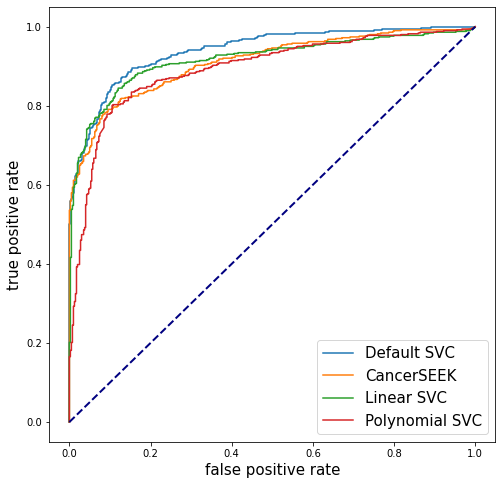

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
fpr1, tpr1, _ = roc_curve(y_test, y_pred_def[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, CancerSEEK[1::2])
fpr3, tpr3, _ = roc_curve(y_test, y_pred_lin[:, 1])
fpr4, tpr4, _ = roc_curve(y_test, y_pred_poly[:, 1])

plt.plot(fpr1, tpr1, label='Default SVC')
plt.plot(fpr2, tpr2, label='CancerSEEK')
plt.plot(fpr3, tpr3, label='Linear SVC')
plt.plot(fpr4, tpr4, label='Polynomial SVC')
plt.legend(fontsize=15)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('false positive rate', fontsize=15)
plt.ylabel('true positive rate', fontsize=15)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

As we can see the default SVC predict the best among the others.

# 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters
- prepare data as described in the title, then scale all inputs based on the training set
- select your best performing SVC model from the previous exercise
- check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
- create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
- select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)